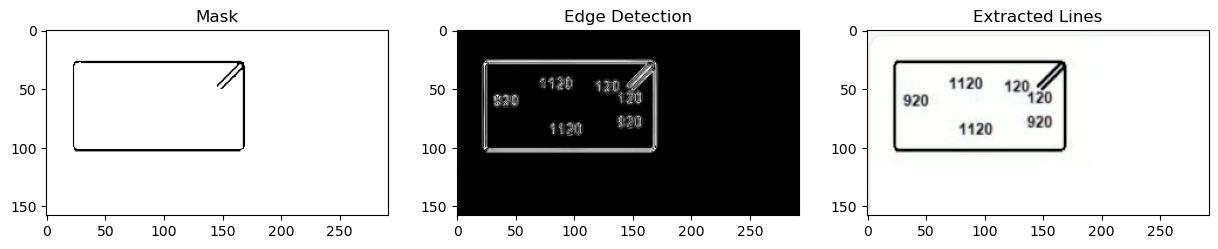

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = "4.png"

# Load the image
img = cv2.imread(image_path)

# Grayscale Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 30, 70, 60)

# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Contour Detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the area
area_threshold = 100  # Adjust this threshold as needed
filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > area_threshold:
        filtered_contours.append(cnt)

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Threshold
threshold_value = 85
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the mask to create a mask for lines
mask = cv2.bitwise_not(closed_binary)

# Apply the mask to the original image to extract lines
extracted_lines = cv2.bitwise_and(img, img, mask=mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Plot the Adaptive Binary image
plt.subplot(1, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# # Plot the image without numbers
plt.subplot(1, 3, 3)
plt.imshow(extracted_lines)
plt.title('Extracted Lines')

# Show the plots
plt.show()

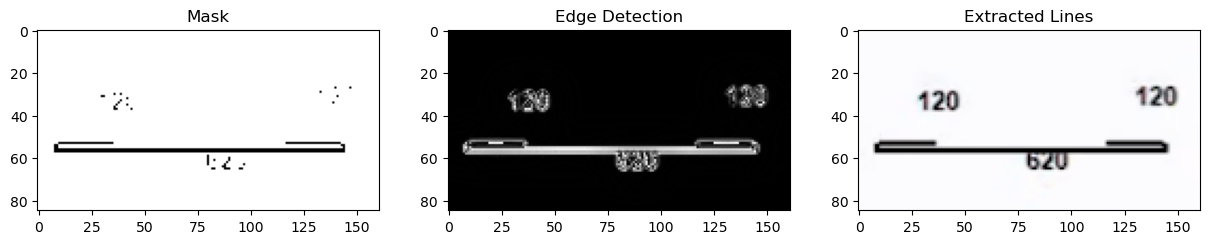

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = "st_bar_main.png"

# Load the image
img = cv2.imread(image_path)

# Grayscale Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 30, 70, 60)

# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Contour Detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the area
area_threshold = 100  # Adjust this threshold as needed
filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > area_threshold:
        filtered_contours.append(cnt)

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Threshold
threshold_value = 85
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the mask to create a mask for lines
mask = cv2.bitwise_not(closed_binary)

# Apply the mask to the original image to extract lines
extracted_lines = cv2.bitwise_and(img, img, mask=mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Plot the Adaptive Binary image
plt.subplot(1, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# # Plot the image without numbers
plt.subplot(1, 3, 3)
plt.imshow(extracted_lines)
plt.title('Extracted Lines')

# Show the plots
plt.show()

## Perimeter Approach

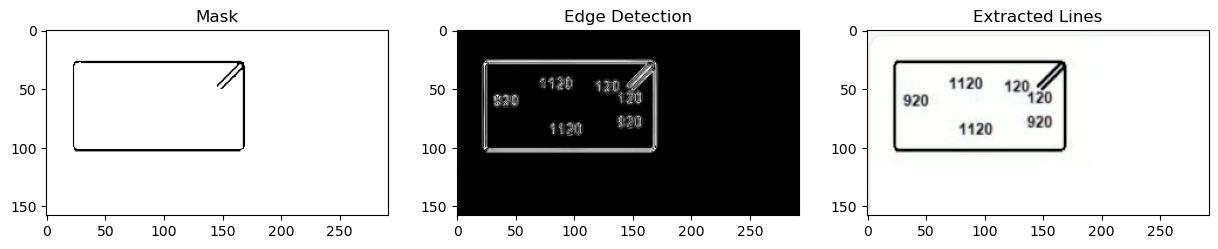

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = "4.png"

# Load the image
img = cv2.imread(image_path)

# Grayscale Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 30, 70, 60)

# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Contour Detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the perimeter
perimeter_threshold = 60  # Adjust this threshold as needed
filtered_contours = []
for cnt in contours:
    perimeter = cv2.arcLength(cnt, True)
    if perimeter > perimeter_threshold:
        filtered_contours.append(cnt)

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Threshold
threshold_value = 85
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the mask to create a mask for lines
mask = cv2.bitwise_not(closed_binary)

# Apply the mask to the original image to extract lines
extracted_lines = cv2.bitwise_and(img, img, mask=mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Plot the Adaptive Binary image
plt.subplot(1, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# # Plot the image without numbers
plt.subplot(1, 3, 3)
plt.imshow(extracted_lines)
plt.title('Extracted Lines')

# Show the plots
plt.show()

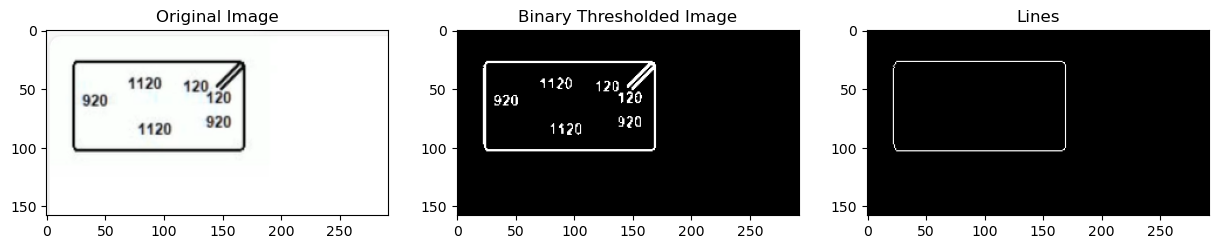

In [18]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def remove_small_objects(contours, area_threshold):
    """
    Remove small objects from a list of contours based on a given area threshold.

    Parameters:
    contours (list): A list of contours.
    area_threshold (int): The minimum area threshold for keeping a contour.

    Returns:
    list: A list of filtered contours with areas greater than the threshold.
    """

    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > area_threshold:
            filtered_contours.append(contour)

    return filtered_contours

image_path = "4.png"

# Load the image
img = cv2.imread(image_path)

# Grayscale Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 30, 70, 60)

# Binary Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Contour Detection
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the area
area_threshold = 300  # Adjust this threshold as needed
filtered_contours = remove_small_objects(contours, area_threshold)

# Create a blank image
blank_image = np.zeros_like(img)

# Draw the filtered contours on the blank image
cv2.drawContours(blank_image, filtered_contours, -1, (255, 255, 255), 1)

cv2.imshow('Lines', blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the binary thresholded image
plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Binary Thresholded Image')

# Plot the image with lines
plt.subplot(1, 3, 3)
plt.imshow(blank_image, cmap='gray')
plt.title('Lines')

# Show the plots
plt.show()